## MO444 Project 3 - Reinforcement Learning

* Rodrigo Araújo Marinho Franco - RA: 233569
* Felipe Marinho Tavares - RA: 265680

### Contributions:
* Rodrigo
 * ...
* Felipe
 * ...

# PART I - Evolutionary Model

# PART II - Reinforcement Learning

In [1]:
import sys
sys.path.append("search/")

import torch
import matplotlib.pyplot as plt

import environment

## SmallClassic Environment - Training

Initial state:


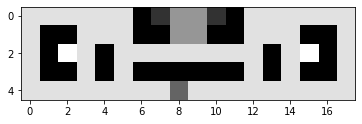

Shape:  (5, 18, 1)
Episode:  1 Average Score: -467.00 Average Number of actions: 107.00 Average Foods eaten: 14.00 Winrate: 0.00%
Episode:  100 Average Score: -398.47 Average Number of actions: 41.07 Average Foods eaten: 14.06 Winrate: 0.00%
Episode:  200 Average Score: -381.84 Average Number of actions: 51.54 Average Foods eaten: 15.77 Winrate: 0.00%
Episode:  300 Average Score: -308.77 Average Number of actions: 108.57 Average Foods eaten: 27.28 Winrate: 1.00%
Episode:  400 Average Score: -239.88 Average Number of actions: 127.58 Average Foods eaten: 33.74 Winrate: 3.00%
Episode:  500 Average Score: -135.10 Average Number of actions: 153.20 Average Foods eaten: 38.41 Winrate: 11.00%
Episode:  600 Average Score: -5.34 Average Number of actions: 142.44 Average Foods eaten: 42.05 Winrate: 18.00%
Episode:  700 Average Score: 139.00 Average Number of actions: 122.60 Average Foods eaten: 42.79 Winrate: 29.00%
Episode:  800 Average Score: 100.45 Average Number of actions: 105.75 Average Foo

In [2]:
params = {
    "buffer_size": int(5e5),  # replay buffer size
    "batch_size": 32,        # minibatch size
    "gamma": 0.99,            # discount factor
    "tau": 1e-3,              # for soft update of target parameters
    "lr": 1e-3,               # learning rate
    "update_every": 10         # how often to update the network
}

# layouts = smallClassic, mediumClassic, originalClassic
layout = "smallClassic"
env = environment.Environment(params, layout=layout, use_features=True)
checkpoint_filename = "checkpoint_{:}.pth".format(layout)

n_episodes = 10000
print_every = 100  # episodes
patience = 15      # max print_every without improvement tolarated
checkpoints_without_improvement = 0

best_score = {
    "episode_number": -1,
    "average_score": -1000.0,
    "average_num_actions": 0,
    "average_num_foods_eaten": 0,
    "winrate": 0.0
}
for i_episode in range(1, n_episodes + 1):
    env.reset()

    while not env.done():
        env.step()

    average_score, average_foods_eaten, average_num_actions, winrate = env.compute_scores()

    if i_episode == 1 or i_episode % print_every == 0:
        print("Episode: ", i_episode, end=" ")
        print('Average Score: {:.2f}'.format(average_score), end=" ")
        print('Average Number of actions: {:.2f}'.format(average_num_actions), end=" ")
        print('Average Foods eaten: {:.2f}/{:}'.format(average_foods_eaten, env.layout.totalFood), end=" ")
        print('Winrate: {:.2f}%'.format(winrate))

        if average_score > best_score["average_score"]:
            checkpoints_without_improvement = 0
            best_score["episode_number"] = i_episode
            best_score["average_score"] = average_score
            best_score["average_num_actions"] = average_num_actions
            best_score["average_num_foods_eaten"] = average_foods_eaten
            best_score["winrate"] = winrate
            torch.save(env.pacman.qnetwork_local.state_dict(), 'models/{:}'.format(checkpoint_filename))
        else:
            checkpoints_without_improvement += 1
            if checkpoints_without_improvement == patience:
                print("Stopping training due to lack of improvement")
                break

Best score:
{'episode_number': 3800, 'average_score': 550.19, 'average_num_actions': 113.11, 'average_num_foods_eaten': 47.46, 'winrate': 64.0}


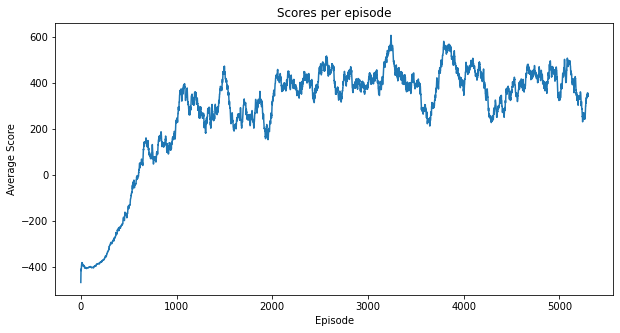

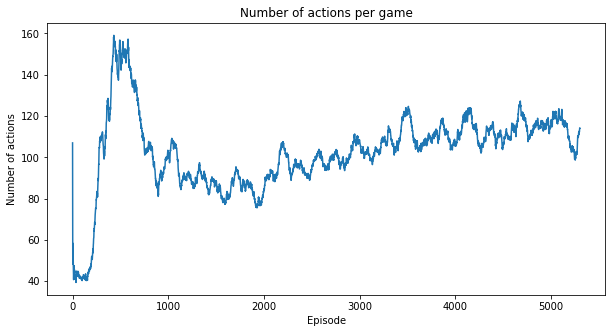

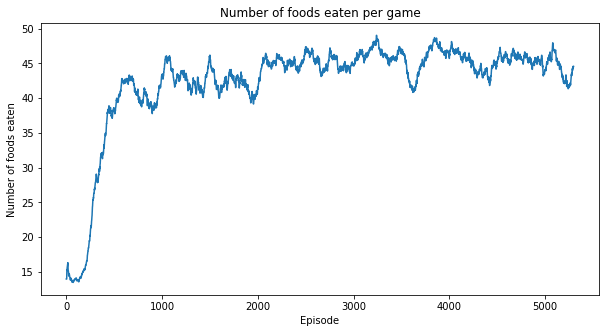

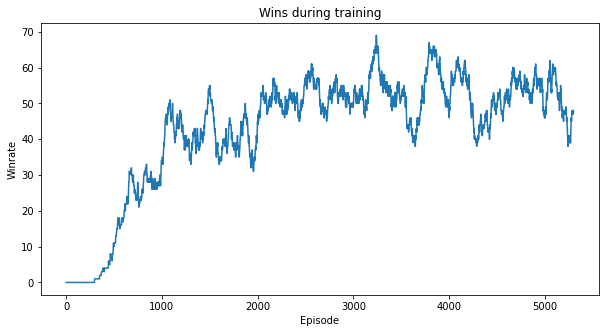

In [5]:
print("Best score:")
print(best_score)

plt.figure(figsize=(10, 5))
plt.title("Scores per episode")
plt.xlabel('Episode')
plt.ylabel('Average Score')
line1, = plt.plot(env.average_scores)
plt.show()

plt.figure(figsize=(10, 5))
plt.title("Number of actions per game")
plt.xlabel('Episode')
plt.ylabel('Number of actions')
line1, = plt.plot(env.average_num_actions)
plt.show()

plt.figure(figsize=(10, 5))
plt.title("Number of foods eaten per game")
plt.xlabel('Episode')
plt.ylabel('Number of foods eaten')
line1, = plt.plot(env.average_foods_eaten)
plt.show()

plt.figure(figsize=(10, 5))
plt.title("Wins during training")
plt.xlabel('Episode')
plt.ylabel('Winrate')
line1, = plt.plot(env.average_wins)
plt.show()